In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
df = pd.read_csv("data/customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Tentukan Jumlah CLuster (Dilakukan sebelum melakukan clustering)

In [3]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

  0%|          | 0/8 [00:00<?, ?it/s]

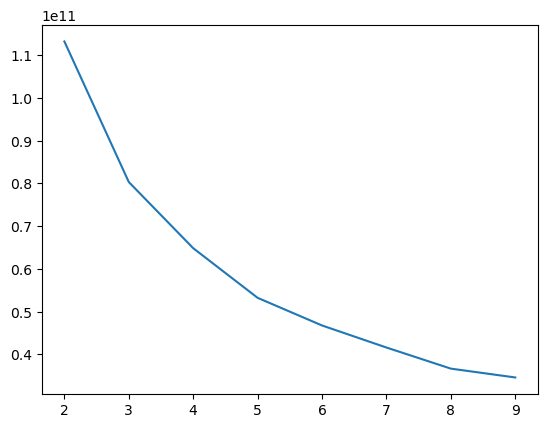

In [4]:
score = []

for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    member = model.fit(df, categorical=[0, 1])
    score.append(model.cost_)
    
plt.plot(range(2, 10), score)

# Training

In [16]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [17]:
df_pred = df.copy()
df_pred["cluster"] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


# Analyze Cluster

In [18]:
num, cat = model.cluster_centroids_

In [19]:
df_cat = pd.DataFrame(cat, columns=df.columns[:2]) # Mengambil kolom dari dataframe asli dan mengisi valuenya dengan centroid dari fitur kategorik
df_num = pd.DataFrame(num, columns=df.columns[2:]) # Mengambil kolom dari dataframe asli dan mengisi valuenya dengan centroid dari fitur numerik
df_cat.join(df_num) # Menggabungkan 2 Dataframe menjadi 1 Dataframe

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667
1,2,3,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000
2,1,3,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970


cluster 0 : Hemat <br>
cluster 1 : Customer yang suka belanja milk, grocery, detergents <br>
cluster 2 : customer yang suka belanja fresh food 

In [21]:

df.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

# Popular conventional approach

Melakukan customer segmentation dengan tier sederhana memanfaatkan **RFM (Recency - Frequency - Monetary)**
- Recency = Seberapa recent transaksinya
- Frequency = Seberapa sering transaksinya
- Monetary = Seberapa besar transaksinya 